In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('D:\Training Sets\Sprints\Heart_Disease\data\heart_disease_after_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          297 non-null    float64
 1   sex          297 non-null    float64
 2   trestbps     297 non-null    float64
 3   chol         297 non-null    float64
 4   fbs          297 non-null    float64
 5   thalach      297 non-null    float64
 6   exang        297 non-null    float64
 7   oldpeak      297 non-null    float64
 8   slope        297 non-null    int64  
 9   ca           297 non-null    float64
 10  target       297 non-null    int64  
 11  cp_2.0       297 non-null    bool   
 12  cp_3.0       297 non-null    bool   
 13  cp_4.0       297 non-null    bool   
 14  restecg_1.0  297 non-null    bool   
 15  restecg_2.0  297 non-null    bool   
 16  thal_6.0     297 non-null    bool   
 17  thal_7.0     297 non-null    bool   
dtypes: bool(7), float64(9), int64(2)
memory usage: 27.

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\ELGENDY\AppData\Local\Temp\ipykernel_23520\775615050.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('D:\Training Sets\Sprints\Heart_Disease\data\heart_disease_after_cleaned.csv')


In [37]:
x = df.drop(['target'], axis=1)
y = df['target']

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(x)     

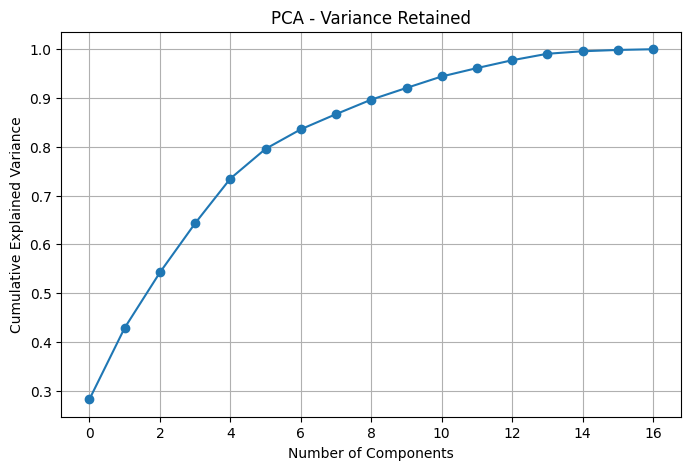

Explained variance ratio: [0.28229779 0.14635045 0.11359979 0.10087111 0.09162333 0.06098103
 0.04007136 0.03111569 0.02971898 0.02399687 0.02350696 0.0172106
 0.01608477 0.01326635 0.00514574 0.00265787 0.00150132]


In [39]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Retained")
plt.grid(True)
plt.show()


print("Explained variance ratio:", pca.explained_variance_ratio_)

In [40]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(x)

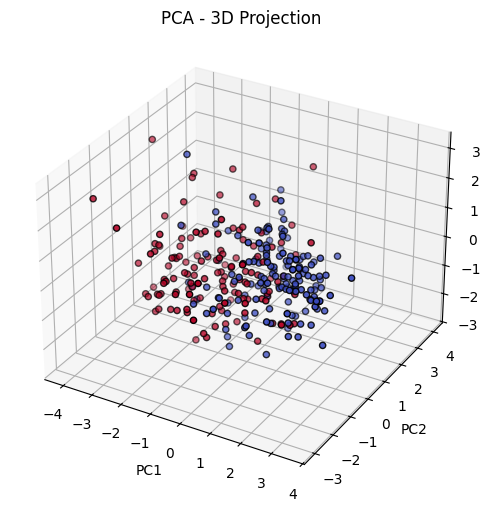

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c=y, cmap='coolwarm', edgecolors='k')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA - 3D Projection')
plt.show()

In [42]:
pca_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y.values
pca_df.to_csv('data/heart_disease_pca.csv', index=False)

In [44]:
data = pd.read_csv('data/heart_disease_pca.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     297 non-null    float64
 1   PC2     297 non-null    float64
 2   PC3     297 non-null    float64
 3   target  297 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.4 KB
